# CPSC 533V: Assignment 3 - Behavioral Cloning and Deep Q Learning

## 48 points total (9% of final grade)

---
This assignment will help you transition from tabular approaches, topic of HW 2, to deep neural network approaches. You will implement the [Atari DQN / Deep Q-Learning](https://arxiv.org/abs/1312.5602) algorithm, which arguably kicked off the modern Deep Reinforcement Learning craze.

In this assignment we will use PyTorch as our deep learning framework.  To familiarize yourself with PyTorch, your first task is to use a behavior cloning (BC) approach to learn a policy.  Behavior cloning is a supervised learning method in which there exists a dataset of expert demonstrations (state-action pairs) and the goal is to learn a policy $\pi$ that mimics this expert.  At any given state, your policy should choose the same action the export would.

Since BC avoids the need to collect data from the policy you are trying to learn, it is relatively simple. 
This makes it a nice stepping stone for implementing DQN. Furthermore, BC is relevant to modern approaches---for example its use as an initialization for systems like [AlphaGo][go] and [AlphaStar][star], which then use RL to further adapte the BC result.  

<!--

I feel like this might be better suited to going lower in the document:

Unfortunately, in many tasks it is impossible to collect good expert demonstrations, making

it's not always possible to have good expert demonstrations for a task in an environemnt and this is where reinforcement learning comes handy. Through the reward signal retrieved by interacting with the environment, the agent learns by itself what is a good policy and can learn to outperform the experts.

-->

Goals:
- Famliarize yourself with PyTorch and its API including models, datasets, dataloaders
- Implement a supervised learning approach (behavioral cloning) to learn a policy.
- Implement the DQN objective and learn a policy through environment interaction.

[go]:  https://deepmind.com/research/case-studies/alphago-the-story-so-far
[star]: https://deepmind.com/blog/article/alphastar-mastering-real-time-strategy-game-starcraft-ii

## Submission information

- Complete the assignment by editing and executing the associated Python files.
- Copy and paste the code and the terminal output requested in the predefined cells on this Jupyter notebook.
- When done, upload the completed Jupyter notebook (ipynb file) on canvas.

### Seyedeh Neda Ahmadi Amiri 32068363
### Zahra Gholami  69209732

## Task 0: Preliminaries

### PyTorch

If you have never used PyTorch before, we recommend you follow this [60 Minutes Blitz][blitz] tutorial from the official website. It should give you enough context to be able to complete the assignment.


**If you have issues, post questions to Piazza**

### Installation

To install all required python packages:

```
python3 -m pip install -r requirements.txt
```

### Debugging


You can include:  `import ipdb; ipdb.set_trace()` in your code and it will drop you to that point in the code, where you can interact with variables and test out expressions.  We recommend this as an effective method to debug the algorithms.


[blitz]: https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

In [2]:
#!python3 -m pip install -r requirements.txt
import torch
import pickle
import torch.nn.functional as F
import numpy as np

## Task 1: Behavioral Cloning

Behavioral Cloning is a type of supervised learning in which you are given a dataset of expert demonstrations tuple $(s, a)$ and the goal is to learn a policy function $\hat a = \pi(s)$, such that $\hat a = a$.

The optimization objective is $\min_\theta D(\pi(s), a)$ where $\theta$ are the parameters the policy $\pi$, in our case the weights of a neural network, and where $D$ represents some difference between the actions.

---

Before starting, we suggest reading through the provided files.

For Behavioral Cloning, the important files to understand are: `model.py`, `dataset.py` and `bc.py`.

- The file `model.py` has the skeleton for the model (which you will have to complete in the following questions),

- The file `dataset.py` has the skeleton for the dataset the model is being trained with,

- and, `bc.py` will have all the structure for training the model with the dataset.


### 1.1 Dataset

We provide a pickle file with pre-collected expert demonstrations on CartPole from which to learn the policy $\pi$. The data has been collected from an expert policy on the environment, with the addition of a small amount of gaussian noise to the actions.

The pickle file contains a list of tuples of states and actions in `numpy` in the following way:

```
[(state s, action a), (state s, action a), (state s, action a), ...]
```

In the `dataset.py` file, we provide skeleton code for creating a custom dataset. The provided code shows how to load the file.

Your goal is to overwrite the `__getitem__` function in order to return a dictionary of tensors of the correct type.

Hint: Look in the `bc.py` file to understand how the dataset is used.

Answer the following questions:

- [**QUESTION 2 points]** Insert your code in the placeholder below.

In [91]:
def __getitem__(self, index):
    item = self.data[index]
    # Returns a Dictionary in which the tensor of state and one hot encoded of label
    dic={'state': torch.tensor(item[0]),'action': F.onehot(torch.tensor(item[1]))}
    return dic

#### Values needed to answer questions

In [9]:
import pickle
import torch
with open("CartPole-v0_dataset.pkl", 'rb') as f:
    data = pickle.load(f)
# Num of Examples in dataset
size_dataset=len(data)
print('How Big is The Dataset? It has:',size_dataset,'instances')

# Dimension of state
size_state=len(data[0][0])
print('Dimensionality of  𝑠? Each state has',size_state,'parameters')

# Range of state
state=[]
action0=0
for i,sa in enumerate(data):
    state.append(list(sa[0]))
    if sa[1]==0:
        action0+=1
minst=np.min(np.array(state),axis=0)
maxst=np.max(np.array(state),axis=0)
print("Range of each dimension of state span: ")
print("Dimenssion 1: [min: ",minst[0],", max: ",maxst[0],"]")
print("Dimenssion 2: [min: ",minst[1],", max: ",maxst[1],"]")
print("Dimenssion 3: [min: ",minst[2],", max: ",maxst[2],"]")
print("Dimenssion 4: [min: ",minst[3],", max: ",maxst[3],"]")
print("Number of instances with action 0:",action0," , with action 1: ", len(data)-action0)

How Big is The Dataset? It has: 99660 instances
Dimensionality of  𝑠? Each state has 4 parameters
Range of each dimension of state span: 
Dimenssion 1: [min:  -0.7226705660038144 , max:  2.3994859590448474 ]
Dimenssion 2: [min:  -0.4330368853821298 , max:  1.8469797499257607 ]
Dimenssion 3: [min:  -0.050071982930833064 , max:  0.14641718032715906 ]
Dimenssion 4: [min:  -0.38122098085691347 , max:  0.47143313845955753 ]
Number of instances with action 0: 48555  , with action 1:  51105


- **[QUESTION 2 points]** How big is the dataset provided? 

**ANSWER:** The dataset has 99660 instances.(Shown in code above)

- **[QUESTION 2 points]** What is the dimensionality of $s$ and what range does each dimension of $s$ span?  I.e., how much of the state space does the expert data cover?

**ANSWER:** 
At each state it measures 4 values and returns it as observation which have been listed below:

1) Cart position which takes a value in range of (-4.8,4.8)

2) Cart Velocity which takes a value in range of (-Inf, Inf)

3) Pole Angle which takes a value in range of ((-24 deg),(24 deg))

4) Pole Angular Velocity which takes a value in range of (-Inf, Inf)

The state space that the expert data cover: 

Dimenssion 1: [min:  -0.72267 , max:  2.39948 ]

Dimenssion 2: [min:  -0.43303 , max:  1.84697 ]

Dimenssion 3: [min:  -0.05007 , max:  0.1464 ]

Dimenssion 4: [min:  -0.38122 , max:  0.47143 ]

As it can be seen, the state space is not covered very well. A large portion of possible states are not in expert dataset. As well as that, data is not symmetrical. 

- **[QUESTION 2 points]** What are the dimensionalities and ranges of the action $a$ in the dataset (how much of the action space does the expert data cover)?

**ANSWER:** 

For action space we have a discrete space of 2 which consists of 0(This action pushes cart to the left) and 1(This action pushes cart to the right). In expert dataset there are 48555 instances with action 0 and 51105 instances with action 1. Therefore, action space has been covered.


### 1.2 Environment

Recall the state and action space of CartPole, from the previous assignment.

- **[QUESTION 2 points]** Considering the full state and action spaces, do you think the provided expert dataset has good coverage?  Why or why not? How might this impact the performance of our cloned policy?

**ANSWER** : 

No most of data are representing the cartpole in its initial state. The cart is in the middle, the pole is upright. And for other types of data the states are really sparse and does not cover a large portion of environment. Therefore, not only it has not a good coverage of full state action space, it does not cover a large range in which the cart and pole are in unsteady situation. The impact of this on cloned policy performance is that the model does not know what action to take in most of situations it may face. In another words, because the model has not seen sufficient data it fails to generalize.   

### 1.3 Model

The file `model.py` provides skeleton code for the model. Your goal is to create the architecture of the network by adding layers that map the input to output.

You will need to update the `__init__` method and the `forward` method.

The `select_action` method has already been written for you.  This should be used when running the policy in the environment, while the `forward` function should be used at training time.

- [**QUESTION 5 points]** Insert your code in the placeholder below.

In [93]:
import torch.nn as nn
import torch.nn.functional as F

class MyModel(nn.Module):
    def __init__(self, state_size, action_size):
        super(MyModel, self).__init__()
        # TODO YOUR CODE HERE FOR INITIALIZING THE MODEL
        self.layer1 = nn.Linear(state_size, 64)
        self.layer2 = nn.Linear(64, 128)
        self.layer3 = nn.Linear(128, action_size)


    def forward(self, x):
        # TODO YOUR CODE HERE FOR THE FORWARD PASS
        x = self.layer1(x)
        #print(x.shape)
        x = F.relu(x)
        x = self.layer2(x)
        x= F.relu(x)
        x= self.layer3(x)
        return x

    def select_action(self, state):
        self.eval()
        x = self.forward(state)
        #print(x.shape)
        self.train()
        #return (x[0,1]>0.5).view(1, 1).to(torch.long)
        
        return x.max(1)[1].view(1, 1).to(torch.long)

Answer the following questions:

- **[QUESTION 2 points]** What is the input of the network?

**ANSWER:**

The input of network is the state of the environment which consists of 4 parameters. All of these parameters are explained above. These values give a representation of cartpole position and situation to the network.

- **[QUESTION 2 points]** What is the output?

**ANSWER:**

The output of network is the action the cartpole should take which consists of going left or right. Basically the network gives us the probability that each of possible actions should be chosen. The DQN network however, gives us the Q value and its argmax gives us the action. 

### 1.4 Training

The file `bc.py` is the entry point for training your behavioral cloning model. The skeleton and the main components are already there.

The missing parts for you to do are:

- Initializing the model
- Choosing a loss function
- Choosing an optimizer
- Playing with hyperparameters to train your model.

- [**QUESTION 5 points]** Insert your code in the placeholder below.

In [94]:
# PLACEHOLDER FOR YOUR CODE HER
# HOW DID YOU INITIALIZE YOUR MODEL, OPTIMIZER AND LOSS FUNCTIONS? PASTE HERE YOUR FINAL CODE
# NOTE: YOU CAN KEEP THE FOLLOWING LINES COMMENTED OUT, AS RUNNING THIS CELL WILL PROBABLY RESULT IN ERRORS

BATCH_SIZE = 64
TOTAL_EPOCHS = 10
LEARNING_RATE = 10e-2
PRINT_INTERVAL = 500
TEST_INTERVAL = 2

ENV_NAME = 'CartPole-v0'

dataset = Dataset(data_path="{}_dataset.pkl".format(ENV_NAME))
dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, num_workers=4)

env = gym.make(ENV_NAME)
#device='cpu'
# TODO INITIALIZE YOUR MODEL HERE
model = MyModel(4,2).to(device)

def train_behavioral_cloning():
    
    # TODO CHOOSE A OPTIMIZER AND A LOSS FUNCTION FOR TRAINING YOUR NETWORK
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
    loss_function = BCELoss()

    gradient_steps = 0

    for epoch in range(1, TOTAL_EPOCHS + 1):
        for iteration, data in enumerate(dataloader):
            #print(data)
            data = {k: v.to(device) for k, v in data.items()}

            output = model(data['state'].type(torch.FloatTensor).to(device))
            output = F.sigmoid(output)
            #print(output)
            loss = loss_function(output.squeeze(), data["action"].type(torch.FloatTensor).to(device))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if gradient_steps % PRINT_INTERVAL == 0:
                print('[epoch {:4d}/{}] [iter {:7d}] [loss {:.5f}]'
                    .format(epoch, TOTAL_EPOCHS, gradient_steps, loss.item()))
            
            gradient_steps += 1

        if epoch % TEST_INTERVAL == 0:
            score = eval_policy(policy=model, env=ENV_NAME)
            print('[Test on environment] [epoch {}/{}] [score {:.2f}]'
                .format(epoch, TOTAL_EPOCHS, score))

    model_name = "behavioral_cloning_{}.pt".format(ENV_NAME)
    print('Saving model as {}'.format(model_name))
    torch.save(model.state_dict(), model_name)


if __name__ == "__main__":
    train_behavioral_cloning()


- For initialization we have assigned random uniform values to weights and 0 to all biases.

- For optimizer we have used Adam optimizer.

- For loss function we used MSELoss.

You can run your code by doing:

```
python3 bc.py
```

**During all of this assignment, the code in `eval_policy.py` will be your best friend.** At any time, you can test your model by giving as argument the path to the model weights and the environment name using the following command:

```
python3 eval_policy.py --model-path /path/to/model/weights --env ENV_NAME
````

In [97]:
## PASTE YOUR TERMINAL OUTPUT HERE
!python3 bc.py
#!python3 eval_policy.py --model-path /path/to/model/weights --env ENV_NAME
# NOTE: TO HAVE LESS LINES PRINTED, YOU CAN SET THE VARIABLE PRINT_INTERVAL TO 5 or 10

[epoch    1/10] [iter       0] [loss 0.69083]
[epoch    1/10] [iter     500] [loss 0.07618]
[epoch    1/10] [iter    1000] [loss 0.04492]
[epoch    1/10] [iter    1500] [loss 0.03616]
[epoch    2/10] [iter    2000] [loss 0.01639]
[epoch    2/10] [iter    2500] [loss 0.01401]
[epoch    2/10] [iter    3000] [loss 0.00614]
[Test on environment] [epoch 2/10] [score 200.00]
[epoch    3/10] [iter    3500] [loss 0.00828]
[epoch    3/10] [iter    4000] [loss 0.01707]
[epoch    3/10] [iter    4500] [loss 0.01077]
[epoch    4/10] [iter    5000] [loss 0.00264]
[epoch    4/10] [iter    5500] [loss 0.00913]
[epoch    4/10] [iter    6000] [loss 0.06474]
[Test on environment] [epoch 4/10] [score 200.00]
[epoch    5/10] [iter    6500] [loss 0.00483]
[epoch    5/10] [iter    7000] [loss 0.00093]
[epoch    5/10] [iter    7500] [loss 0.01810]
[epoch    6/10] [iter    8000] [loss 0.00458]
[epoch    6/10] [iter    8500] [loss 0.00581]
[epoch    6/10] [iter    9000] [loss 0.05903]
[Test on environment] [epo

**[QUESTION 2 points]** Did you manage to learn a good policy? How consistent is the reward you are getting?

**ANSWER:**

The policy performs very well for expert data and it reaches to a high reward very soon in training proccess, because when the model resets it is usually has a similar state to what the model was trained with, the model will be able to get a good reward. But it doesnot necessary means it has managed to learn a good policy because if it sees a state it hasn't seen before it will fail to generalize. And as soon as the state gets more and more different with expert samples, the chosen action will be worse.

## Task 2: Deep Q Learning

There are two main issues with the behavior cloning approach.

- First, we are not always lucky enough to have access to a dataset of expert demonstrations.
- Second, replicating an expert policy suffers from compounding error. The policy $\pi$ only sees these "perfect" examples and has no knowledge on how to recover from states not visited by the expert. For this reason, as soon as it is presented with a state that is off the expert trajectory, it will perform poorly and will continue to deviate from a good trajectory without the possibility of recovering from errors.

---
The second task consists in solving the environment from scratch, using RL, and most specifically the DQN algorithm, to learn a policy $\pi$.

For this task, familiarize yourself with the file `dqn.py`. We are going to re-use the file `model.py` for the model you created in the previous task.

Your task is very similar to the one in the previous assignment, to implement the Q-learning algorithm, but in this version, our Q-function is approximated with a neural network.

The algorithm (excerpted from Section 6.5 of [Sutton's book](http://incompleteideas.net/book/RLbook2018.pdf)) is given below:

![DQN algorithm](https://i.imgur.com/Mh4Uxta.png)

### 2.0 Think about your model...



**[QUESTION 2 points]** In DQN, we are using the same model as in task 1 for behavioral cloning. In both tasks the model receives as input the state and in both tasks the model outputs something that has the same dimensionality as the number of actions. These two outputs, though, represent very different things. What is each one representing?

**ANSWER:** The output of behavioural coloning network is the action the cartpole should take which consists of going left or right. Basically the network gives us the probability that each of possible actions should be chosen. The DQN network however, gives us the Q value and it shows how much is the expected reward the agent may get being in that state choosing an action. The argmax of netwotk gives us the action. 

### 2.1 Update your Q-function

Complete the `optimize_model` function. This function receives as input a `state`, an `action`, the `next_state`, the `reward` and `done` representing the tuple $(s_t, a_t, s_{t+1}, r_t, done_t)$. Your task is to update your Q-function as shown in the [Atari DQN paper](https://arxiv.org/abs/1312.5602) environment. For now don't be concerned with the experience replay buffer. We'll get to that later.

![Loss function](https://i.imgur.com/tpTsV8m.png)

- [**QUESTION 8 points]** Insert your code in the placeholder below.

In [10]:
def optimize_model(state, action, next_state, reward, done):
    # TODO given a tuple (s_t, a_t, s_{t+1}, r_t, done_t) update your model weights
    (values, indices) = torch.max(target(next_state.detach().clone()).view(-1,2),dim=1)
    # Output value
    y = reward + (torch.logical_not(done)) * GAMMA* values
    # Predicted value
    y_pred = torch.gather(model(state.detach().clone()).view(-1,2), dim=1, index=action.type(torch.LongTensor).squeeze().to(device).view(-1,1)).squeeze()
    # Calculated loss
    loss = loss_function(y_pred , y.squeeze())/BATCH_SIZE
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

### 2.2 $\epsilon$-greedy strategy

You will need a strategy to explore your environment. The standard strategy is to use $\epsilon$-greedy. Implement it in the `choose_action` function template.

- [**QUESTION 5 points]** Insert your code in the placeholder below.

In [9]:
## PLACEHOLDER TO INSERT YOUR choose_action function here:
def choose_action(state, test_mode=False):
    # TODO implement an epsilon-greedy strategy
    # Constant epsilon
    epsilon = 0.05
    
    x = random.uniform(0,1)
    
    if x<epsilon:
        return torch.tensor(random.randint(0 ,env.action_space.n-1)).view(1, 1)
   
    else:
        return torch.argmax(model(torch.tensor(state).to(device))).view(1, 1)

### 2.3 Train your model

Try to train a model in this way.

You can run your code by doing:

```
python3 dqn.py
```

**[QUESTION 2 points]** How many episodes does it take to learn (ie. reach a good reward)?

**ANSWER:**
It reaches to an average reward of 200 as early as 600 steps but the model is still a little bit unstable. The average reward keeps jumping up and down. However, in extra we have used decaying epsilon ehich performs much better than constant epsilon. Although $\varepsilon $-greedy action selection is an effective and popular means of balancing exploration and exploitation in reinforcement learning, one drawback is that when it explores it chooses equally among all actions. Meaning that its likely to choose the worst action and the best one with same probability. One solution is asigning a higher probability to the greedy action and a lower one to an action with lower value function. 
For deep Q learning however, using other action selection methods are possible. Depending on the problem at hand, different policies can perform better. The softmax action selection strategy has also been implemented below. This action selection also has a very good result.

In [15]:
## PASTE YOUR TERMINAL OUTPUT HERE
# Change variable Replay t to False to get results without replay
!python3 dqn.py

# NOTE: TO HAVE LESS LINES PRINTED, YOU CAN SET THE VARIABLE PRINT_INTERVAL TO 5 or 10

[Episode   10/4000] [Steps    9] [reward 10.0]
[Episode   20/4000] [Steps   28] [reward 29.0]
----------
saving model.
[TEST Episode 25] [Average Reward 8.9]
----------
[Episode   30/4000] [Steps   10] [reward 11.0]
[Episode   40/4000] [Steps    7] [reward 8.0]
[Episode   50/4000] [Steps    8] [reward 9.0]
----------
saving model.
[TEST Episode 50] [Average Reward 9.3]
----------
[Episode   60/4000] [Steps   10] [reward 11.0]
[Episode   70/4000] [Steps    9] [reward 10.0]
----------
saving model.
[TEST Episode 75] [Average Reward 9.4]
----------
[Episode   80/4000] [Steps    8] [reward 9.0]
[Episode   90/4000] [Steps    8] [reward 9.0]
[Episode  100/4000] [Steps    7] [reward 8.0]
----------
saving model.
[TEST Episode 100] [Average Reward 9.5]
----------
[Episode  110/4000] [Steps   23] [reward 24.0]
[Episode  120/4000] [Steps    9] [reward 10.0]
----------
[TEST Episode 125] [Average Reward 9.5]
----------
[Episode  130/4000] [Steps    8] [reward 9.0]
[Episode  140/4000] [Steps   12]

[Episode 1130/4000] [Steps   11] [reward 12.0]
[Episode 1140/4000] [Steps   73] [reward 74.0]
[Episode 1150/4000] [Steps   64] [reward 65.0]
----------
[TEST Episode 1150] [Average Reward 59.2]
----------
[Episode 1160/4000] [Steps   76] [reward 77.0]
[Episode 1170/4000] [Steps    8] [reward 9.0]
----------
[TEST Episode 1175] [Average Reward 51.1]
----------
[Episode 1180/4000] [Steps    9] [reward 10.0]
[Episode 1190/4000] [Steps   57] [reward 58.0]
[Episode 1200/4000] [Steps   52] [reward 53.0]
----------
[TEST Episode 1200] [Average Reward 58.1]
----------
[Episode 1210/4000] [Steps   30] [reward 31.0]
[Episode 1220/4000] [Steps  103] [reward 104.0]
----------
[TEST Episode 1225] [Average Reward 49.0]
----------
[Episode 1230/4000] [Steps   96] [reward 97.0]
[Episode 1240/4000] [Steps   10] [reward 11.0]
[Episode 1250/4000] [Steps   15] [reward 16.0]
----------
[TEST Episode 1250] [Average Reward 36.8]
----------
[Episode 1260/4000] [Steps   54] [reward 55.0]
[Episode 1270/4000] [S

[Episode 2260/4000] [Steps  113] [reward 114.0]
[Episode 2270/4000] [Steps  109] [reward 110.0]
----------
[TEST Episode 2275] [Average Reward 200.0]
----------
[Episode 2280/4000] [Steps   38] [reward 39.0]
[Episode 2290/4000] [Steps   56] [reward 57.0]
[Episode 2300/4000] [Steps   10] [reward 11.0]
----------
[TEST Episode 2300] [Average Reward 10.2]
----------
[Episode 2310/4000] [Steps  181] [reward 182.0]
[Episode 2320/4000] [Steps   12] [reward 13.0]
----------
[TEST Episode 2325] [Average Reward 59.3]
----------
[Episode 2330/4000] [Steps  199] [reward 200.0]
[Episode 2340/4000] [Steps  199] [reward 200.0]
[Episode 2350/4000] [Steps   25] [reward 26.0]
----------
[TEST Episode 2350] [Average Reward 13.0]
----------
[Episode 2360/4000] [Steps  199] [reward 200.0]
[Episode 2370/4000] [Steps  142] [reward 143.0]
----------
[TEST Episode 2375] [Average Reward 20.0]
----------
[Episode 2380/4000] [Steps  119] [reward 120.0]
[Episode 2390/4000] [Steps  199] [reward 200.0]
[Episode 240

[Episode 3380/4000] [Steps  105] [reward 106.0]
[Episode 3390/4000] [Steps   11] [reward 12.0]
[Episode 3400/4000] [Steps   11] [reward 12.0]
----------
[TEST Episode 3400] [Average Reward 60.5]
----------
[Episode 3410/4000] [Steps  123] [reward 124.0]
[Episode 3420/4000] [Steps  118] [reward 119.0]
----------
[TEST Episode 3425] [Average Reward 87.2]
----------
[Episode 3430/4000] [Steps   11] [reward 12.0]
[Episode 3440/4000] [Steps   98] [reward 99.0]
[Episode 3450/4000] [Steps  108] [reward 109.0]
----------
[TEST Episode 3450] [Average Reward 107.7]
----------
[Episode 3460/4000] [Steps  103] [reward 104.0]
[Episode 3470/4000] [Steps   28] [reward 29.0]
----------
[TEST Episode 3475] [Average Reward 92.4]
----------
[Episode 3480/4000] [Steps   61] [reward 62.0]
[Episode 3490/4000] [Steps  123] [reward 124.0]
[Episode 3500/4000] [Steps   32] [reward 33.0]
----------
[TEST Episode 3500] [Average Reward 23.7]
----------
[Episode 3510/4000] [Steps   15] [reward 16.0]
[Episode 3520/4

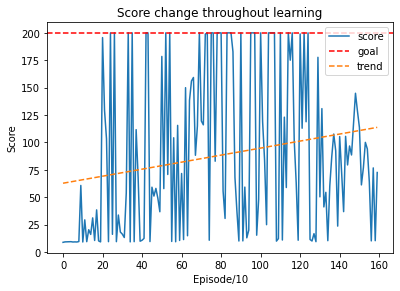

In [58]:
import matplotlib.pyplot as plt
with open("score.txt", 'r') as f:
    score = [float(line.rstrip('\n')) for line in f]
fig = plt.figure()
x = range(len(score))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax.plot(range(len(score)),score,label='score')
ax.axhline(200, c='red',ls='--', label='goal')
ax.set_xlabel('Episode/10')
ax.set_ylabel('Score')
ax.set_title('Score change throughout learning')
# Calculate the trend
try:
    z = np.polyfit(x, score, 1)
    p = np.poly1d(z)
    ax.plot(x,p(x),"--", label='trend')
except:
    print('')
ax.legend()

The approximation of 𝑄 using one sample at a time is not very effective. The graph above is a nice illustration of that. The network managed to achieve a much better performance compared to a random agent. Ther are some instances throughtout the learning that the model was able to get 200 reward but updating the target function in each step makes the model very unsteady. Therefore, very low scores can be found after very large ones.

### 2.4 Add the Experience Replay Buffer

If you read the DQN paper (and as you can see from the algorithm picture above), the authors make use of an experience replay buffer to learn faster. We provide an implementation in the file `replay_buffer.py`. Update the `train_reinforcement_learning` code to push a tuple to the replay buffer and to sample a batch for the `optimize_model` function.

**[QUESTION 5 points]** How does the replay buffer improve performances?

**ANSWER:** Using Experience Replay Buffer, the agent could has a very more stable situation to reach the maximum reward. We can see that adding replay will make the model more robust and steady. Because the Q value is not constatly changing updating Q values will be less affected by noise(Our expert data in DQN is not so expert because it has only exprienced few innstances and uptaded the Q function by only seeing those states, actions and rewards). how benifiting drom past expericenc can effectivly increase the convergance time of the algortihm.
The results as shown below are more steady and it converges faster as well.

In [25]:
## PASTE YOUR TERMINAL OUTPUT HERE
# Change variable Replay t to True to get results with replay
!python3 dqn.py
# NOTE: TO HAVE LESS LINES PRINTED, YOU CAN SET THE VARIABLE PRINT_INTERVAL TO 5 or 10

[Episode   10/4000] [Steps    7] [reward 8.0]
[Episode   20/4000] [Steps    8] [reward 9.0]
----------
saving model.
[TEST Episode 25] [Average Reward 9.2]
----------
[Episode   30/4000] [Steps    9] [reward 10.0]
[Episode   40/4000] [Steps    9] [reward 10.0]
[Episode   50/4000] [Steps  107] [reward 108.0]
----------
saving model.
[TEST Episode 50] [Average Reward 89.9]
----------
[Episode   60/4000] [Steps   99] [reward 100.0]
[Episode   70/4000] [Steps   82] [reward 83.0]
----------
saving model.
[TEST Episode 75] [Average Reward 92.4]
----------
[Episode   80/4000] [Steps   28] [reward 29.0]
[Episode   90/4000] [Steps   91] [reward 92.0]
[Episode  100/4000] [Steps   97] [reward 98.0]
----------
[TEST Episode 100] [Average Reward 92.1]
----------
[Episode  110/4000] [Steps  125] [reward 126.0]
[Episode  120/4000] [Steps  199] [reward 200.0]
----------
saving model.
[TEST Episode 125] [Average Reward 153.5]
----------
[Episode  130/4000] [Steps  187] [reward 188.0]
[Episode  140/4000

----------
[TEST Episode 1125] [Average Reward 200.0]
----------
[Episode 1130/4000] [Steps  153] [reward 154.0]
[Episode 1140/4000] [Steps  199] [reward 200.0]
[Episode 1150/4000] [Steps  199] [reward 200.0]
----------
[TEST Episode 1150] [Average Reward 200.0]
----------
[Episode 1160/4000] [Steps  199] [reward 200.0]
[Episode 1170/4000] [Steps  199] [reward 200.0]
----------
[TEST Episode 1175] [Average Reward 95.5]
----------
[Episode 1180/4000] [Steps   16] [reward 17.0]
[Episode 1190/4000] [Steps  147] [reward 148.0]
[Episode 1200/4000] [Steps  140] [reward 141.0]
----------
[TEST Episode 1200] [Average Reward 135.5]
----------
[Episode 1210/4000] [Steps    8] [reward 9.0]
[Episode 1220/4000] [Steps  167] [reward 168.0]
----------
[TEST Episode 1225] [Average Reward 119.0]
----------
[Episode 1230/4000] [Steps  174] [reward 175.0]
[Episode 1240/4000] [Steps    8] [reward 9.0]
[Episode 1250/4000] [Steps   98] [reward 99.0]
----------
[TEST Episode 1250] [Average Reward 200.0]
----

[Episode 2240/4000] [Steps   16] [reward 17.0]
[Episode 2250/4000] [Steps   16] [reward 17.0]
----------
[TEST Episode 2250] [Average Reward 18.1]
----------
[Episode 2260/4000] [Steps   37] [reward 38.0]
[Episode 2270/4000] [Steps   71] [reward 72.0]
----------
[TEST Episode 2275] [Average Reward 200.0]
----------
[Episode 2280/4000] [Steps  199] [reward 200.0]
[Episode 2290/4000] [Steps  199] [reward 200.0]
[Episode 2300/4000] [Steps  199] [reward 200.0]
----------
[TEST Episode 2300] [Average Reward 196.2]
----------
[Episode 2310/4000] [Steps  199] [reward 200.0]
[Episode 2320/4000] [Steps  199] [reward 200.0]
----------
[TEST Episode 2325] [Average Reward 200.0]
----------
[Episode 2330/4000] [Steps  199] [reward 200.0]
[Episode 2340/4000] [Steps  199] [reward 200.0]
[Episode 2350/4000] [Steps  199] [reward 200.0]
----------
[TEST Episode 2350] [Average Reward 200.0]
----------
[Episode 2360/4000] [Steps   12] [reward 13.0]
[Episode 2370/4000] [Steps   10] [reward 11.0]
----------

[TEST Episode 3350] [Average Reward 200.0]
----------
[Episode 3360/4000] [Steps   23] [reward 24.0]
[Episode 3370/4000] [Steps  199] [reward 200.0]
----------
[TEST Episode 3375] [Average Reward 87.9]
----------
[Episode 3380/4000] [Steps  199] [reward 200.0]
[Episode 3390/4000] [Steps  199] [reward 200.0]
[Episode 3400/4000] [Steps   89] [reward 90.0]
----------
[TEST Episode 3400] [Average Reward 200.0]
----------
[Episode 3410/4000] [Steps   74] [reward 75.0]
[Episode 3420/4000] [Steps  199] [reward 200.0]
----------
[TEST Episode 3425] [Average Reward 200.0]
----------
[Episode 3430/4000] [Steps  199] [reward 200.0]
[Episode 3440/4000] [Steps   97] [reward 98.0]
[Episode 3450/4000] [Steps   61] [reward 62.0]
----------
[TEST Episode 3450] [Average Reward 98.8]
----------
[Episode 3460/4000] [Steps   90] [reward 91.0]
[Episode 3470/4000] [Steps   94] [reward 95.0]
----------
[TEST Episode 3475] [Average Reward 97.1]
----------
[Episode 3480/4000] [Steps   88] [reward 89.0]
[Episode

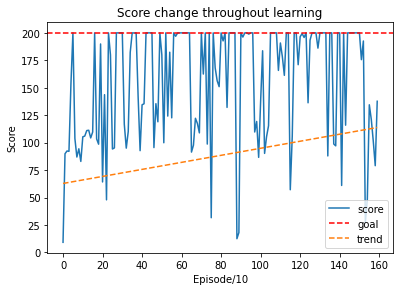

In [59]:
import matplotlib.pyplot as plt
with open("replay_score.txt", 'r') as f:
    score2 = [float(line.rstrip('\n')) for line in f]
fig = plt.figure()
x = range(len(score2))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax.plot(range(len(score2)),score2,label='score')
ax.axhline(200, c='red',ls='--', label='goal')
ax.set_xlabel('Episode/10')
ax.set_ylabel('Score')
ax.set_title('Score change throughout learning')
# Calculate the trend
try:
    z = np.polyfit(x, score2, 1)
    p2 = np.poly1d(z)
    ax.plot(x,p(x),"--", label='trend')
except:
    print('')
ax.legend()

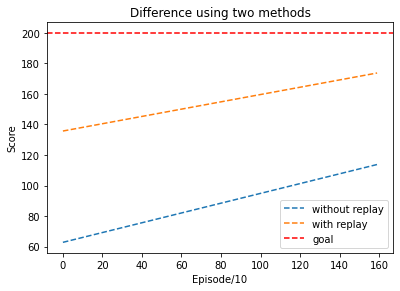

In [65]:
fig = plt.figure()
x = range(len(score2))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax.plot(x,p(x),"--", label='without replay')
ax.plot(x,p2(x),"--", label='with replay')
ax.axhline(200, c='red',ls='--', label='goal')
ax.set_xlabel('Episode/10')
ax.set_ylabel('Score')
ax.set_title('Difference using two methods')
ax.legend()

We can see that adding replay will make the model more robust and steady. The difference between orange and blue line clearly shows us the difference. We can see that the performance increases over time. However because the agent is still choosing action greedily we can see some bad rewards in between.

## Task 3: Extra

Ideas to experiment with:

- Is $\epsilon$-greedy strategy the best strategy available? Why not trying something different.
- Why not make use of the model you have trained in the behavioral cloning part and fine-tune it with RL? How does that affect performance?
- You are perhaps bored with `CartPole-v0` by now. Another environment we suggest trying is `LunarLander-v2`. It will be harder to learn but with experimentation, you will find the correct optimizations for success. Piazza is also your friend :)
- What about learning from images? This requires more work because you have to extract the image from the environment. However, would it be possible? How much more challenging might you expect the learning to be in this case?
- The ReplayBuffer implementation provided is very simple. In class we have briefly mentioned Prioritized Experience Replay; how would the learning process change?
- An improvement over DQN is DoubleDQN, which is a very simple addition to the current code.



### 1)epsilon decrease throughout time
One option is starting with a high $\varepsilon to explore at first and then decreasing it each iteration. This may help to adjust Q values at first and to have a more stable action selection as we go forward. 

In [13]:
def choose_action(state,step ,test_mode=False):
    # TODO implement an epsilon-greedy strategy
    #### EPSILON CHANGES PER STEP
    epsilon = 1/(step**0.5)
    x = random.uniform(0,1)
    if x<epsilon:
        return torch.tensor(random.randint(0 ,env.action_space.n-1)).view(1, 1)
    else:
        return torch.argmax(model(torch.tensor(state).to(device))).view(1, 1)


In [7]:
### RUN THE NEW NETWORK
!python3 dqn_extra.py

[Episode   10/2000] [Steps    9] [reward 10.0]
[Episode   20/2000] [Steps    9] [reward 10.0]
----------
saving model.
[TEST Episode 25] [Average Reward 9.5]
----------
[Episode   30/2000] [Steps   16] [reward 17.0]
[Episode   40/2000] [Steps   10] [reward 11.0]
[Episode   50/2000] [Steps   22] [reward 23.0]
----------
saving model.
[TEST Episode 50] [Average Reward 16.3]
----------
[Episode   60/2000] [Steps  162] [reward 163.0]
[Episode   70/2000] [Steps  113] [reward 114.0]
----------
saving model.
[TEST Episode 75] [Average Reward 110.5]
----------
[Episode   80/2000] [Steps  126] [reward 127.0]
[Episode   90/2000] [Steps  105] [reward 106.0]
[Episode  100/2000] [Steps  118] [reward 119.0]
----------
[TEST Episode 100] [Average Reward 51.0]
----------
[Episode  110/2000] [Steps  103] [reward 104.0]
[Episode  120/2000] [Steps  107] [reward 108.0]
----------
saving model.
[TEST Episode 125] [Average Reward 114.7]
----------
[Episode  130/2000] [Steps  135] [reward 136.0]
[Episode  14

[Episode 1120/2000] [Steps  199] [reward 200.0]
----------
[TEST Episode 1125] [Average Reward 200.0]
----------
[Episode 1130/2000] [Steps  199] [reward 200.0]
[Episode 1140/2000] [Steps  199] [reward 200.0]
[Episode 1150/2000] [Steps  199] [reward 200.0]
----------
[TEST Episode 1150] [Average Reward 199.1]
----------
[Episode 1160/2000] [Steps  199] [reward 200.0]
[Episode 1170/2000] [Steps  199] [reward 200.0]
----------
[TEST Episode 1175] [Average Reward 200.0]
----------
[Episode 1180/2000] [Steps  195] [reward 196.0]
[Episode 1190/2000] [Steps  199] [reward 200.0]
[Episode 1200/2000] [Steps  199] [reward 200.0]
----------
[TEST Episode 1200] [Average Reward 200.0]
----------
[Episode 1210/2000] [Steps  199] [reward 200.0]
[Episode 1220/2000] [Steps  199] [reward 200.0]
----------
[TEST Episode 1225] [Average Reward 199.9]
----------
[Episode 1230/2000] [Steps  195] [reward 196.0]
[Episode 1240/2000] [Steps  127] [reward 128.0]
[Episode 1250/2000] [Steps  199] [reward 200.0]
---

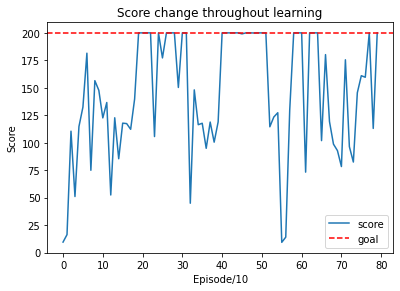

In [22]:
import matplotlib.pyplot as plt
with open("replay_score_e.txt", 'r') as f:
    score2 = [float(line.rstrip('\n')) for line in f]
fig = plt.figure()
x = range(len(score2))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax.plot(range(len(score2)),score2,label='score')
ax.axhline(200, c='red',ls='--', label='goal')
ax.set_xlabel('Episode/10')
ax.set_ylabel('Score')
ax.set_title('Score change throughout learning')
# Calculate the trend
try:
    z = np.polyfit(x, score2, 1)
    p2 = np.poly1d(z)
    ax.plot(x,p(x),"--", label='trend')
except:
    print('')
ax.legend()

##### As we can see the network is more stable comparing to constant epsilon

### Drawbacks of $\varepsilon $-greedy policy
Although $\varepsilon $-greedy action selection is an effective and popular means of balancing exploration and exploitation in reinforcement learning, one drawback is that when it explores it chooses equally among all actions. Meaning that its likely to choose the worst action and the best one with same probability. One solution is asigning a higher probability to the greedy action and a lower one to an action with lower value function. 
For deep Q learning howevre, using other action selection methods are possible. Depending on the problem at hand, different policies can perform better. The softmax action selection strategy provides a similar situation as stated above. It basically controls the relative levels of exploration and exploitation by mapping values into action probabilities. 

In [17]:
def choose_action(state,step ,test_mode=False):
    # TODO implement an epsilon-greedy strategy
    epsilon = 1/(step**0.2)
    x = random.uniform(0,1)
    if x<epsilon:
        # for random choice the larger value is mor likely to be chosen 
        qval = model(torch.tensor(state).to(device)).cpu().detach().numpy()
        prob_action = (qval-np.max(qval))/np.sum((qval-np.max(qval)))
        action = torch.tensor(int(np.random.choice(prob_action,p=prob_action)))
        return action.view(1, 1)
    else:
        return torch.argmax(model(torch.tensor(state).to(device))).view(1, 1)

In [25]:
### RUN THE NEW NETWORK
!python3 dqn_soft.py

[Episode   10/2000] [Steps   19] [reward 20.0]
[Episode   20/2000] [Steps   11] [reward 12.0]
----------
saving model.
[TEST Episode 25] [Average Reward 48.6]
----------
[Episode   30/2000] [Steps   30] [reward 31.0]
[Episode   40/2000] [Steps   33] [reward 34.0]
[Episode   50/2000] [Steps   88] [reward 89.0]
----------
[TEST Episode 50] [Average Reward 27.9]
----------
[Episode   60/2000] [Steps  175] [reward 176.0]
[Episode   70/2000] [Steps  123] [reward 124.0]
----------
saving model.
[TEST Episode 75] [Average Reward 116.2]
----------
[Episode   80/2000] [Steps  109] [reward 110.0]
[Episode   90/2000] [Steps  122] [reward 123.0]
[Episode  100/2000] [Steps   38] [reward 39.0]
----------
[TEST Episode 100] [Average Reward 92.8]
----------
[Episode  110/2000] [Steps   54] [reward 55.0]
[Episode  120/2000] [Steps  121] [reward 122.0]
----------
saving model.
[TEST Episode 125] [Average Reward 198.9]
----------
[Episode  130/2000] [Steps  199] [reward 200.0]
[Episode  140/2000] [Steps 

[TEST Episode 1125] [Average Reward 95.4]
----------
[Episode 1130/2000] [Steps  102] [reward 103.0]
[Episode 1140/2000] [Steps   78] [reward 79.0]
[Episode 1150/2000] [Steps   77] [reward 78.0]
----------
[TEST Episode 1150] [Average Reward 80.7]
----------
[Episode 1160/2000] [Steps  122] [reward 123.0]
[Episode 1170/2000] [Steps   26] [reward 27.0]
----------
[TEST Episode 1175] [Average Reward 108.9]
----------
[Episode 1180/2000] [Steps  199] [reward 200.0]
[Episode 1190/2000] [Steps   98] [reward 99.0]
[Episode 1200/2000] [Steps   98] [reward 99.0]
----------
[TEST Episode 1200] [Average Reward 200.0]
----------
[Episode 1210/2000] [Steps   95] [reward 96.0]
[Episode 1220/2000] [Steps  199] [reward 200.0]
----------
[TEST Episode 1225] [Average Reward 200.0]
----------
[Episode 1230/2000] [Steps   77] [reward 78.0]
[Episode 1240/2000] [Steps  199] [reward 200.0]
[Episode 1250/2000] [Steps   26] [reward 27.0]
----------
[TEST Episode 1250] [Average Reward 93.6]
----------
[Episode

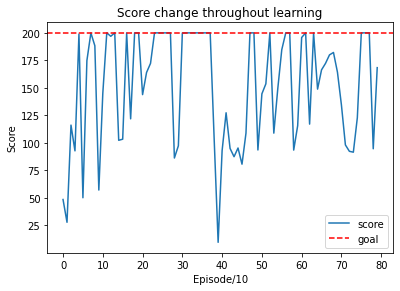

In [26]:
import matplotlib.pyplot as plt
with open("replay_score_soft.txt", 'r') as f:
    score3 = [float(line.rstrip('\n')) for line in f]
fig = plt.figure()
x = range(len(score3))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax.plot(range(len(score3)),score3,label='score')
ax.axhline(200, c='red',ls='--', label='goal')
ax.set_xlabel('Episode/10')
ax.set_ylabel('Score')
ax.set_title('Score change throughout learning')
# Calculate the trend
try:
    z = np.polyfit(x, score3, 1)
    p2 = np.poly1d(z)
    ax.plot(x,p(x),"--", label='trend')
except:
    print('')
ax.legend()

##### Again its more steady comparing to e-greedy with constant value

### Double deep Q Learning

Traditional Deep Q Learning tends to overestimate the reward, which leads to unstable training and lower quality policy. 
Double DQN uses two different Deep Neural Networks, Deep Q Network (DQN) and Target Network.
- Deep Q Network — selecting the best action a with maximum Q-value of next state.
- Target Network —calculating the estimated Q-value with action a selected above.
- Update the Q-value of Deep Q Network based on the estimated Q-value from Target Network
- Update the parameters of Target Network based on the parameters of Deep Q Network per several iterations.
- Update the parameters of Deep Q Network based on Adam optimizer.



### Prioritized Experience Replay:
This prioritization can lead to a loss of diversity, which is alleviated with stochastic prioritization, and introduce bias, which can be corrected with importance sampling.
The stochastic sampling method interpolates between pure greedy prioritization and uniform random sampling. The probability of being sampled is ensured to be monotonic in a transition's priority, while guaranteeing a non-zero probability even for the lowest-priority transition. Concretely, define the probability of sampling transition  as:

$ P(i) = \frac{p_i^\alpha}{ \sum_k p_k^\alpha } $


 
where $p_i>0$ is the priority of transition i. The exponent $\alpha$  determines how much prioritization is used, with $\alpha=0$ corresponding to the uniform case.